Backpropagation

In [2]:
import numpy as np
import pandas as pd

In [3]:
def sigmoid(x):
    return 1/1+np.exp(-x)

In [4]:
def derivative_sigmoid(x):
    return x*(1-x)

In [7]:
inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
outputs=np.array([[0],[1],[1],[0]])

In [8]:
input_neurons=inputs.shape[1]
hidden_neurons=2
output_neurons=1

In [24]:
hidden_weights=np.random.uniform(low=0,high=0.7,size=(input_neurons,hidden_neurons))
hidden_bias = np.random.uniform(low=0,high=0.7,size=(1,hidden_neurons))

In [25]:
hidden_weights

array([[0.41227653, 0.40007077],
       [0.0360313 , 0.4350879 ]])

In [26]:
hidden_bias

array([[0.42468751, 0.26687788]])

In [27]:
output_weights=np.random.uniform(low=0,high=0.7,size=(hidden_neurons,output_neurons))
output_bias = np.random.uniform(low=0,high=0.7,size=(1,output_neurons))

In [28]:
output_weights

array([[0.03141362],
       [0.2244206 ]])

In [29]:
output_bias

array([[0.07999579]])

In [30]:
lr=0.1

In [44]:
for epoch in range(1000):
#     feedforward
    hidden_inputs=np.dot(inputs,hidden_weights)+hidden_bias
    hidden_output=sigmoid(hidden_inputs)
    output_inputs=np.dot(hidden_output,output_weights)+output_bias
    predicted_output=sigmoid(output_inputs)
    
#     backword
    error=outputs-predicted_output
    d_predict_output=error*derivative_sigmoid(predicted_output)
    
    
    error_hidden_layer=np.dot(d_predict_output,output_weights.T)
    d_hidden_layer=error_hidden_layer*derivative_sigmoid(hidden_output)
    
    output_weights=output_weights+hidden_output.T.dot(d_predict_output)*lr
    output_bias+=np.sum(d_predict_output,axis=0,keepdims=True)*lr
    
    hidden_weights+=inputs.T.dot(d_hidden_layer)*lr
    hidden_bias+=np.sum(d_hidden_layer,axis=0,keepdims=True)*lr
    
    
    

In [45]:
# np.dot(inputs,hidden_weights)+hidden_bias

In [46]:
print("output:")
print(predicted_output)

output:
[[1.00005903]
 [1.00002382]
 [1.00004037]
 [1.00001632]]


In [41]:
# from sklearn.metrics import accuracy_score

Rbf

In [51]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot 

In [53]:
X,y=make_moons(n_samples=5,noise=0.2,random_state=60)
X,y

(array([[ 1.27172281,  0.14836788],
        [ 2.04041403,  0.83028869],
        [ 1.0371697 , -0.42161243],
        [ 0.02439636,  0.23206946],
        [-1.01412759,  0.06940757]]),
 array([0, 1, 1, 1, 0], dtype=int64))

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge

In [39]:
rbf_model=make_pipeline(PolynomialFeatures(degree=2),
             KernelRidge(kernel="rbf",gamma=1))

In [40]:
rbf_model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('kernelridge', KernelRidge(gamma=1, kernel='rbf'))])

In [48]:
y_pred=rbf_model.predict(x_test)
y_pred_bin=np.round(y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_bin)

0.96

In [49]:
def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,0].min()-1,X[:,0].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                     np.arange(y_min,y_max,0.01))
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z_round=np.round(z).reshape(xx.shape)
    plt.contourf(xx,yy,z_round,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y,marker="o",edgecolors="black")
    plt.title("RBF NN")
    plt.show()

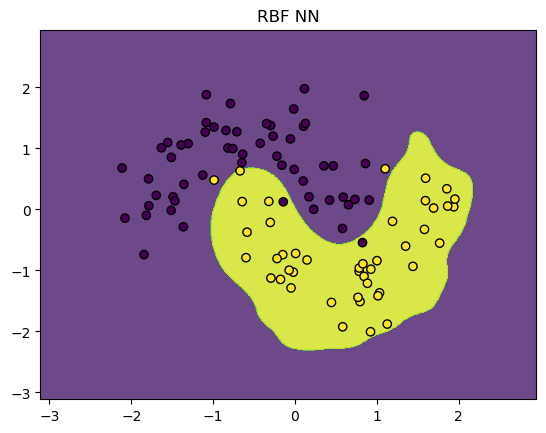

In [50]:
plot_decision_boundary(rbf_model,x_test,y_test)